# KNN -- exploring some datasets

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

## 1. Flights

In [10]:
df = pd.read_csv('data/flights.csv') #, index_col = 0

df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [11]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


#### Flights doesn't make sense

## 2. Tips

In [13]:
df = pd.read_csv('data/tips.csv')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### tips doesn't make sense

## 3. Iris

In [15]:
df = pd.read_csv('data/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Iris might make sense
- But... it classifies 3 ways... simpler to just classify 2 ways I think

## 4. Titanic

In [16]:
df = pd.read_csv('data/titanic.csv')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### How could I use Titanic
- Obviously, I want to categorize people as survived or not survived -- that's the compelling/intuitive 'wow' factor
- But ... How would that work...

### 4.1 Portilla's 'horse', 'dog' example
<img src = 'horsedog.JPG' width = 600>

#### Summary of this:
- Two quantitative factors:
    - Weight
    - Height
- One classification factor:
    - Dog vs horse (one or the other)

### How would this work for Titanic?

In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [21]:
df = df[['pclass', 'sex', 'age', 'fare',
       'class', 'survived']]

df.head()

,pclass,sex,age,fare,class,survived
0,3,male,22.0,7.2500,Third,0
1,1,female,38.0,71.2833,First,1
2,3,female,26.0,7.9250,Third,1
3,1,female,35.0,53.1000,First,1
4,3,male,35.0,8.0500,Third,0


In [29]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [38]:
df.corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


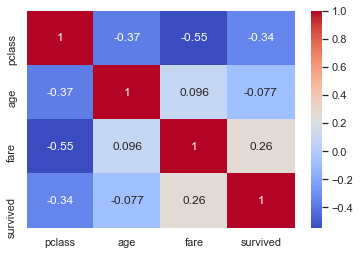

In [39]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

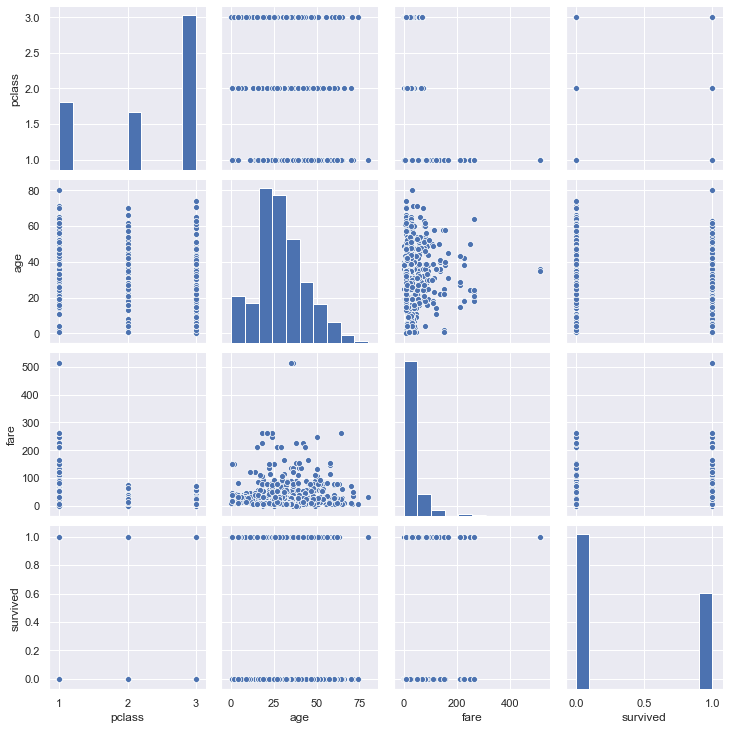

In [33]:
sns.pairplot(df)

#### Based on above, there's strong correlation between fare/survived and age/survived

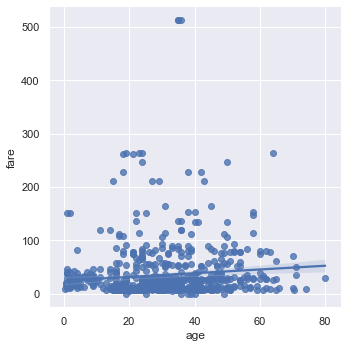

In [37]:
sns.lmplot('age', 'fare', df)

## I think I'll do this

- One classification
    - Survived = True or False
- Two quantitative factors:
    - Fare
    - Age
    
Fare is a proxy for cabin class.
Age... at the least, children should be more likely to survive.